# Exploring Fitbit user data 2

### The data

In [1]:
# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

# Load csv-file 1
df_1 = pd.read_csv("steps.csv", sep=";")

# Load csv-file 2
df_2 = pd.read_csv("survey.csv")

# Merge csv's
df = pd.merge(df_1, df_2, on="id")

df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


### Calculations and subsets

In [2]:
# Calculate mean steps per user
df["mean_steps"] = round(df.loc[:, "20-6-2013":"13-5-2014"].mean(axis=1))

df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10206.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8302.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.0


In [3]:
# Subset the data
df_subset = df[(df["mean_steps"] < 20000) & (df["weight"].between(45, 200)) & (df["height"].between(100,210))]

### The relation between mean steps per user, weight, and height

In [4]:
# Correlation matrix
corr = round(df_subset[["mean_steps", "weight", "height"]].corr(), 2)
corr

,mean_steps,weight,height
mean_steps,1.00,-0.07,-0.08
weight,-0.07,1.00,0.51
height,-0.08,0.51,1.00


Conclusions from the correlation matrix:

* weight and height are moderately correlated (0.8 $>$ _r_ $\ge$ 0.4), as was to be expected
* mean steps has a very weak negative correlation with both weight and height (0 $>$ _r_ $\ge$ -0.4)

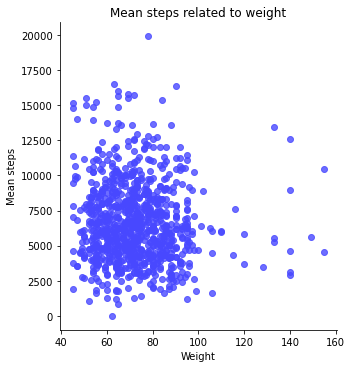

In [5]:
# Set palette
sns.set_palette(sns.color_palette("bwr"))

# Scatter plot (weight)
sns.lmplot(x="weight", y="mean_steps", fit_reg=False, data=df_subset)
plt.title("Mean steps related to weight")
plt.ylabel("Mean steps")
plt.xlabel("Weight")
plt.show()

The first scatter plot (weight) shows:

* most dots overlapping in the same area, meaning that most Fitbit users weigh 40-100 kg and walk 2.500-10.000 mean steps;
* this oval shape has no linear correlation

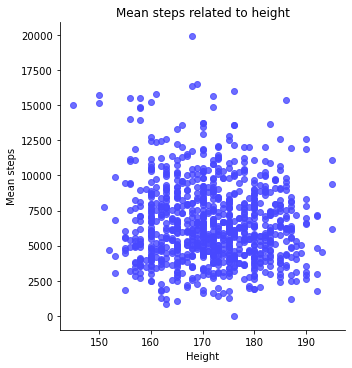

In [6]:
# Set palette
sns.set_palette(sns.color_palette("bwr"))

# Scatter plot (height)
sns.lmplot(x="height", y="mean_steps", fit_reg=False, data=df_subset)
plt.title("Mean steps related to height")
plt.ylabel("Mean steps")
plt.xlabel("Height")
plt.show()

The second scatter plot (height) shows:

* the most common heights as darker vertical lines (160, 170, 175, and 180 cm);
* along these vertical lines (and for other weights as well) users' means steps are far apart;
* this oval-shape has no linear correlation

### Pearson's _r_

In [7]:
print(pearsonr(df_subset["mean_steps"],df_subset["weight"]))
print(pearsonr(df_subset["mean_steps"],df_subset["height"]))

(-0.0650422970326189, 0.049574185357116884)
(-0.07594788646602638, 0.0218052196573397)


The output shows two numbers: _r_ which is -0.065 / -0.075 and _p_ which is 0.049 / 0.021. This means:

* mean steps has a very weak negative correlation with both weight and height (0 $>$ _r_ $\ge$ -0.4)
* _p_ is significant in both cases

### The relation between mean steps per user, gender, and city

In [14]:
# Check if the number of men and women are equally divided in the data
pd.value_counts(df["gender"])

Male      494
Female    435
Name: gender, dtype: int64

Text(0.5, 0, 'City')

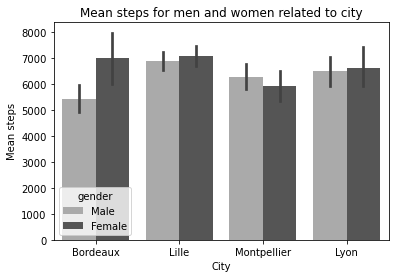

In [9]:
# Bar plot
ax = sns.barplot(x="city", y="mean_steps", hue="gender", data=df_subset, palette="gist_yarg")
plt.title("Mean steps for men and women related to city")
plt.ylabel("Mean steps")
plt.xlabel("City")

Conclusions from the bar plot:

* mean steps is quite evenly distributed between men and women in different cities
* the biggest difference in mean steps between men and woman is found in Bordeaux, where on average, men walk 5.500 steps and women 7.000 steps
* both men and women walk most in Lille

Text(0.5, 0, 'City')

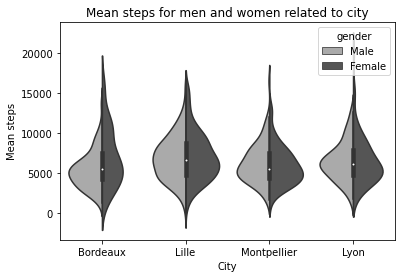

In [15]:
# Violin plot
ax = sns.violinplot(x="city", y="mean_steps", hue="gender", split=True, data=df_subset, palette="gist_yarg")
plt.title("Mean steps for men and women related to city")
plt.ylabel("Mean steps")
plt.xlabel("City")

Conclusions from the violin plot:

* a small number of users with high mean steps are pulling up the means of all violin plots
* in Bordeaux, the mode for both men and women is 5.000 mean steps;
* although the frequency of men having a mean of 5.000 steps is much higher
* Lille has the thickest violin plot (and the longest interquartile range) and therefore the largest number of Fitbit users

### The relation between gender and education

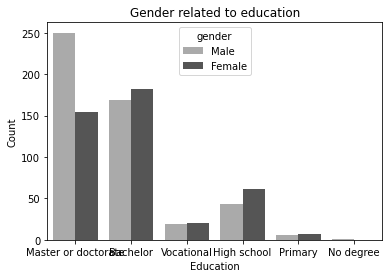

In [11]:
# Count plot
sns.countplot(x="education_1", hue="gender", data=df_subset, palette="gist_yarg")
plt.title("Gender related to education")
plt.ylabel("Count")
plt.xlabel("Education")
plt.show()

Conclusions from the count plot:

* most Fitbit users (men and women) are (highly) educated
* significantly more men than women have a master or doctorate

In [12]:
# Cross table
round(pd.crosstab(df_subset["gender"],df_subset["education_1"], normalize="index") * 100, 2)

education_1,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational
gender,,,,,,
Female,42.92,14.39,36.32,0.0,1.65,4.72
Male,34.63,8.81,51.23,0.2,1.23,3.89
